In [104]:
# -*- coding:utf-8 -*- -
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def clamp(arr):
    return map(lambda x:max(min(x,1),0), arr)
def gy(x1, x2, fx):
    '''
    x1 底色序列
    x2 mask color，为固定值
    fx 根据底色计算输出色的函数
    '''
    y = []
    for xi in x1:
        y.append(fx(xi, x2))
    return y
def draw(mask_color, fx, point_count = 100): 
    x = np.linspace(0, 1, point_count)
    y = np.array( clamp( gy(x, mask_color, fx) ) )

    plt.xlabel('origin color')
    plt.ylabel('output color')
    plt.title('mask color = %.2f, B:0.1,G:0.5,R:0.9' % mask_color)
    plt.plot(x, y )
    plt.axis([-0.01, 1.01, -0.01, 1.01])

def demo(f):
    draw(0.1, f)
    draw(0.5, f)
    draw(0.9, f)

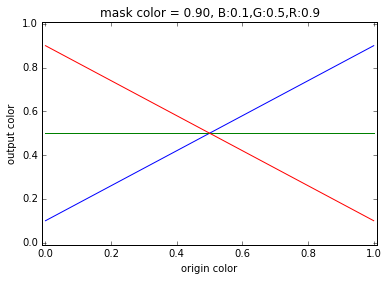

In [105]:
'''
排除（颜色平衡、颜色反相）
y = (a + b) - a * b * 2
函数：
用途：
    可以用来合成两个不重叠的颜色。
        例如绿色排除红色，得到黄色，相当于叠加。
        例如蓝色排除黄色，得到白色，相当于叠加。
    可以用来对某个照片进行反相处理，例如用纯红色，将底色a变成(1-a)
    可以进行颜色调节：
        用饱和度大的颜色作为mask，将 a 变成 (1-a)
        用饱和度小的颜色作为mask，将 a 较大的部分减小一些，a 较小的部分增大一些。
效果：怪异变灰色。
'''
def fx(x1, x2):
    return x1 + x2 - x1 * x2 * 2
#draw(0.4, fx, 1)
demo(fx)


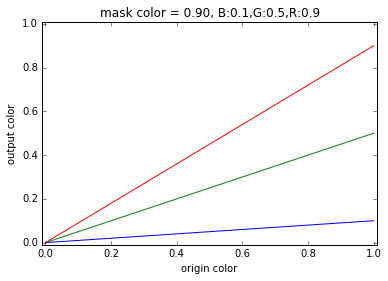

In [106]:
'''
正片叠底（包裹塑料纸）
y = a * b
变暗
函数效果：将a映射到[0,b]。
当alpha == 1时，完全由b来控制a剩余多少，例如b为纯绿色时，a中的红色蓝色全部被过滤掉了，只留下了a中的绿色成分。
    表现出来的效果就像是一个透明绿色塑料片贴在图片上。
风景照叠加纯黄色（即去除部分蓝色）。
'''
def fx(x1, x2):
    return x1 * x2 
demo(fx)

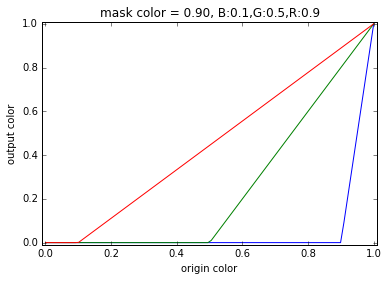

In [107]:
'''
颜色加深（颜色白化）
y = a - (1-a) *(1-b)/b = (1-a-b+ab)/b + a = (1-a)/b - 1 + a + a = 2a - 1 + (1-a) / b
函数：a中[1-b,1]的部分被映射到[0,1]，[0,1-b)部分丢弃变为黑色。
效果：总体上泛黑色。叠加色越暗，效果越明显。
用途：可以将突出显示某个颜色。
'''
def fx(x1, x2):
    return x1-(1-x1)*(1-x2)/x2
demo(fx)

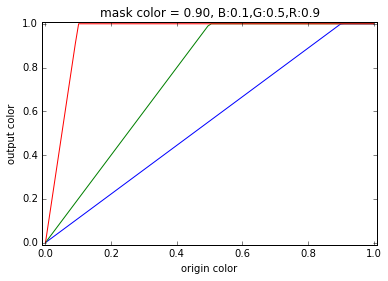

In [108]:
'''
颜色减淡
y = a - a * b / (1- b)
函数：将a的[0,(1-b)]的部分映射到[0,1]，[(1-b),1]部分映射为1
效果：画面总体上泛白色。颜色越亮越明显。
'''
def fx(x1, x2, alpha = 1):
    if x2 > 0.99999:
        return 1
    x2 *= alpha
    return x1+x1*x2/(1-x2)
demo(fx)

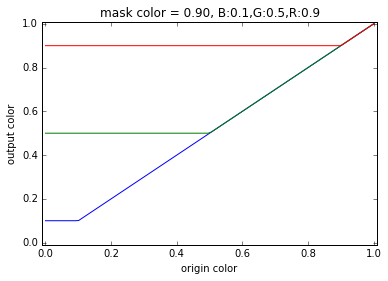

In [109]:
'''
变亮
函数效果：将a中[0,b*alpha]的部分映射为b*alpha，其余部分不变。
效果：颜色越亮越明显。将低于mask颜色的，全部设置为mask颜色。
'''
def fx(x1, x2):
    return x1 if x1 > x2 else x2
mask = 0.2
demo(fx)

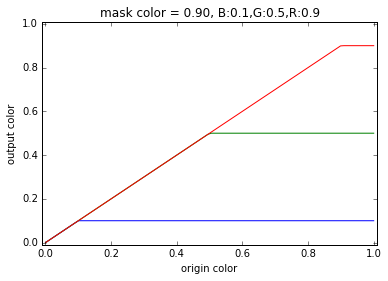

In [110]:
'''
变暗
函数效果：将a中[b*alpha,1]的部分映射为b*alpha，其余部分不变。
作用：1、用黄色去除画面中的蓝色，使得整体色到偏黄色。
'''
def fx(x1, x2):
    return min(x1, x2)
demo(fx)

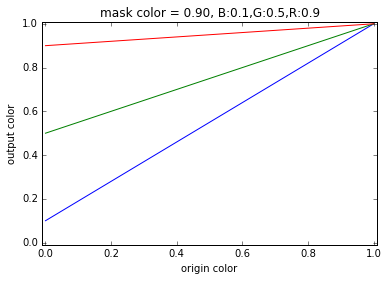

In [111]:

'''
滤色：
y = 1 - (1-a)*(1-b) = a + b - a * b  
排除的公式为 y=a+b-a*b*0.5
函数：将a映射到[b*alpha, 1]中，整体变亮。
结果：y >= a && y >= b，变亮。b为0的时候，y = a，即无效果。
用途：
    1、用暗绿色叠加色去突出显示风景中的绿色；不影响图中的红色和蓝色。
'''
def fx(x1, x2):
    return 1 - (1 - x1) * (1 - x2)
demo(fx)

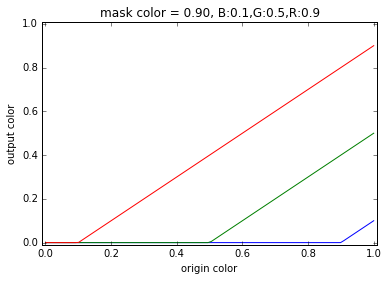

In [124]:
'''
线性加深：
效果：暗处更暗，明处更亮。可以做阴天效果。
'''
def fx(x1, x2):
    return x1 + x2 - 1
demo(fx)

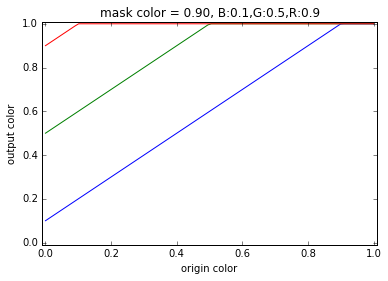

In [113]:
'''
线性减淡：
y = a+b
效果：暗处更暗，明处更亮。可以做晴天效果。
'''
def fx(x1, x2):
    return x1 + x2
demo(fx)

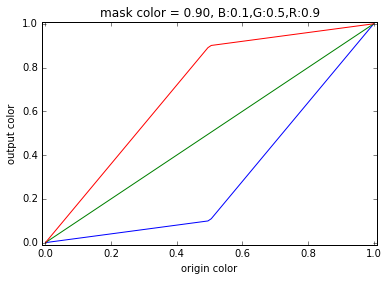

In [114]:
'''
叠加
效果：让中间色更亮或者更暗？
'''
def fx(x1, x2):
    return 2*x1*x2 if x1 < 0.5 else 1-2*(1-x1)*(1-x2)
demo(fx) # 绿线


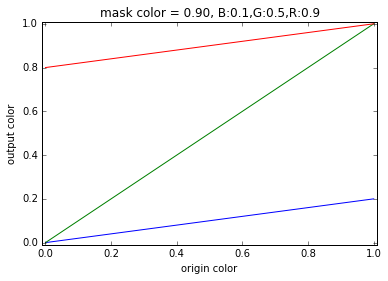

In [115]:
'''
强光
效果：mask暗的地方，底色变暗；mask亮的地方，底色变量。
    强光下增加对比度！
'''
demo(lambda x1,x2:  2*x1*x2 if x2 < 0.5 else 1-2*(1-x1)*(1-x2)  )


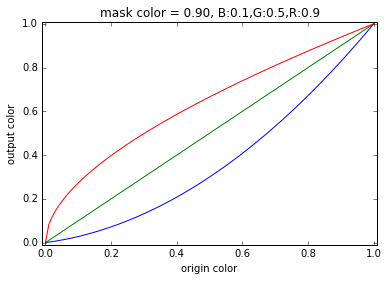

In [116]:
'''
柔光
效果：营造稍微有些亮光的梦幻效果。
'''
demo(lambda x1,x2:  x1*x2*2+x1**2*(1-2*x2) if x2<0.5 else x1*(1-x2)*2+np.sqrt(x1)*(2*x2-1)  )

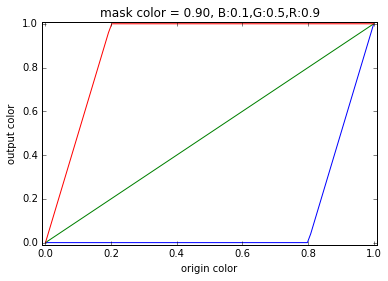

In [117]:
'''
亮光
效果：夸张的明暗对比效果（很多纯白或者纯黑）。适合做太阳的 亮光。
'''
demo(lambda a,b:   a-(1-a)*(1-2*b)/(2*b) if b<0.5 else a+a*(2*b-1)/(2*(1-b))  )

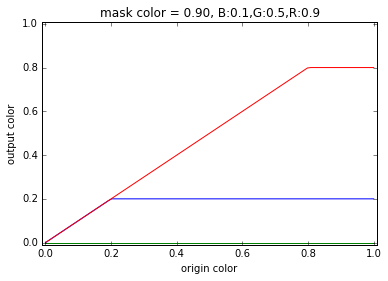

In [118]:
'''
点光
效果：???
'''
demo(lambda a,b:  min(a,2*b) if b<0.5 else min(a,2*b-1) )

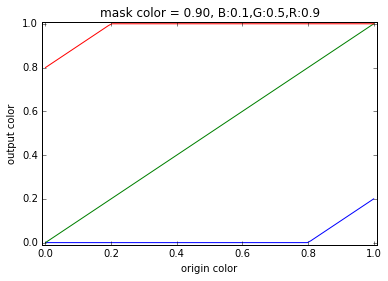

In [119]:
'''
线性光
效果：???
'''
demo(lambda a,b: a+2*b-1 )

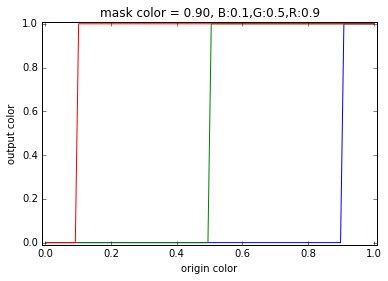

In [120]:
'''
实色混合
效果：8bit效果
'''
demo(lambda a,b: 255 if a+b>1 else 0 )

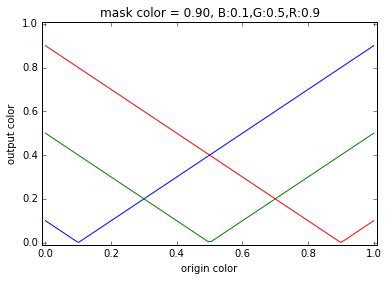

In [121]:
'''
插值
效果：mask白色部分将底色变成胶片效果，黑色部分没有影响。
'''
demo(lambda a,b: abs(a-b) )

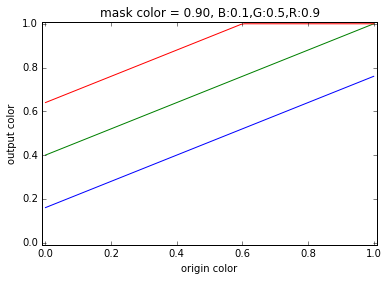

In [122]:
'''
相加
效果：8bit效果
'''
demo(lambda a,b: (a+b)*0.6+0.1 )

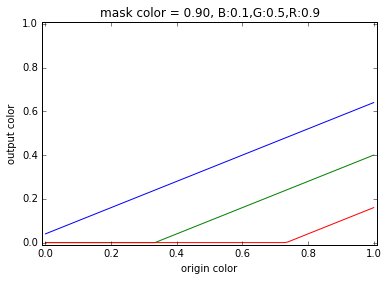

In [123]:
'''
减去
效果：8bit效果
'''
demo(lambda a,b: (a-b)*0.6+0.1 )